In [ ]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('fashionbrands_Ashoka.csv', index_col='brand')
data

,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic
brand,,,,,,,,,
Chanel,449,252,106,236,61,13,8,29,16
Louis Vuitton,410,286,83,142,80,18,20,48,31
Christian Dior,356,200,95,206,67,19,18,27,9
Tiffany,362,219,103,187,59,55,36,35,10
Rolex,442,248,114,89,109,4,9,52,12
Burberry,287,287,143,42,199,29,67,124,9
Ralph Lauren,198,191,101,39,147,61,70,100,9
Benetton,86,62,31,88,35,216,97,65,21
Uniqlo,6,7,10,8,23,260,331,199,291


In [ ]:
data.describe()

,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,237.636364,160.636364,73.272727,95.272727,74.000000,111.090909,90.090909,82.454545,65.000000
std,181.888027,115.666999,48.588251,85.157608,57.771966,116.862701,99.938436,54.100580,98.557597
min,6.000000,5.000000,10.000000,2.000000,10.000000,4.000000,8.000000,27.000000,9.000000
25%,48.000000,36.000000,20.500000,24.000000,29.500000,18.500000,19.000000,41.500000,9.500000
50%,287.000000,200.000000,95.000000,88.000000,61.000000,55.000000,67.000000,65.000000,16.000000
75%,386.000000,250.000000,104.500000,164.500000,94.500000,238.000000,114.500000,112.000000,57.500000
max,449.000000,287.000000,143.000000,236.000000,199.000000,275.000000,331.000000,199.000000,291.000000


In [ ]:
mds = manifold.MDS(n_components=2, metric = False, dissimilarity = "euclidean", random_state = 42) #Taking the Multidimensional scaling method to map similarities between two attributes and using Euclidean as a distance measure
results = mds.fit(data.values) #Trying to fit the model on data given

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
brands = data.index
print(brands)

Index(['Chanel', 'Louis Vuitton', 'Christian Dior', 'Tiffany', 'Rolex',
       'Burberry', 'Ralph Lauren', 'Benetton', 'Uniqlo', 'H&M', 'GAP'],
      dtype='object', name='brand')


In [ ]:
coords = results.embedding_
coords

array([[-0.10810188,  0.23631947],
       [-0.142998  ,  0.28241237],
       [-0.07584754,  0.17031066],
       [-0.18745692,  0.21866271],
       [-0.11450648,  0.31317509],
       [ 0.37967092, -0.55675315],
       [ 0.21494451, -0.4533041 ],
       [ 0.42717691, -0.15030194],
       [-0.19662623, -0.60125769],
       [-0.44267187, -0.01640131],
       [ 0.36352155,  0.5851745 ]])

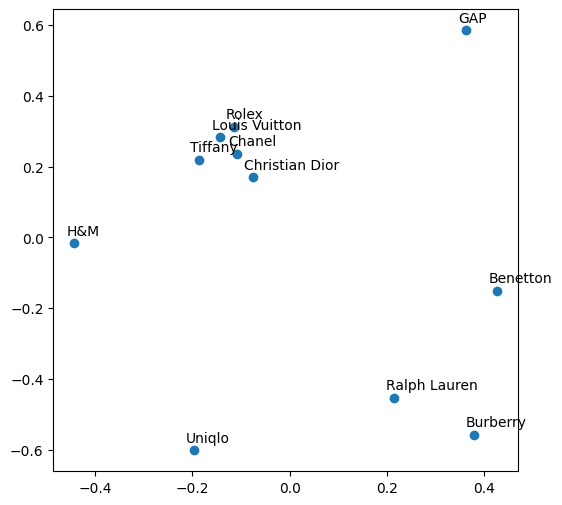

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(coords[:,0], coords[:,1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
  plt.annotate(
      label,
      xy = (x,y),
      xytext = (-6,6),
      textcoords = 'offset points')
plt.show()

In [ ]:
stress = mds.stress_
stress

1.065060604135379